In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

## PART B

In [4]:
# Split data into predictors and target
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Strength']] # independen
target = df['Strength'] # dependent

In [5]:
print(predictors.shape)
print(target.shape)

(1030, 8)
(1030,)


In [6]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.30, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 309
number of training samples: 721


In [8]:
# Definition of the regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(8,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [9]:
# List for mean squared error cumulation
Means = []

# looping 50 times over model
for i in range(50):

    # build the model
    model = regression_model()

    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

    # evaluate the model
    mean = model.evaluate(X_test, y_test, verbose=0)
    Means.append(mean)

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1493.8159 - val_loss: 1515.4581
Epoch 2/50
 - 0s - loss: 1474.8314 - val_loss: 1494.5185
Epoch 3/50
 - 0s - loss: 1455.1537 - val_loss: 1472.9993
Epoch 4/50
 - 0s - loss: 1434.2925 - val_loss: 1450.7774
Epoch 5/50
 - 0s - loss: 1412.8328 - val_loss: 1426.5511
Epoch 6/50
 - 0s - loss: 1389.5720 - val_loss: 1401.9384
Epoch 7/50
 - 0s - loss: 1365.1567 - val_loss: 1375.9949
Epoch 8/50
 - 0s - loss: 1339.8788 - val_loss: 1347.5250
Epoch 9/50
 - 0s - loss: 1312.7825 - val_loss: 1318.6278
Epoch 10/50
 - 0s - loss: 1284.6423 - val_loss: 1288.5410
Epoch 11/50
 - 0s - loss: 1255.5986 - val_loss: 1257.0660
Epoch 12/50
 - 0s - loss: 1225.3331 - val_loss: 1225.0211
Epoch 13/50
 - 0s - loss: 1193.9958 - val_loss: 1191.9465
Epoch 14/50
 - 0s - loss: 1162.2897 - val_loss: 1157.2655
Epoch 15/50
 - 0s - loss: 1128.8408 - val_loss: 1122.7958
Epoch 16/50
 - 0s - loss: 1095.8268 - val_loss: 1086.8305
Epoch 17/50
 - 0s - loss: 1061.1599

 - 0s - loss: 356.7719 - val_loss: 380.8933
Epoch 44/50
 - 0s - loss: 340.7440 - val_loss: 365.9196
Epoch 45/50
 - 0s - loss: 326.1414 - val_loss: 351.9615
Epoch 46/50
 - 0s - loss: 312.4854 - val_loss: 339.2137
Epoch 47/50
 - 0s - loss: 300.2333 - val_loss: 327.3396
Epoch 48/50
 - 0s - loss: 288.5661 - val_loss: 316.7768
Epoch 49/50
 - 0s - loss: 278.0382 - val_loss: 306.9950
Epoch 50/50
 - 0s - loss: 268.3969 - val_loss: 297.9777
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1594.2740 - val_loss: 1614.9305
Epoch 2/50
 - 0s - loss: 1578.0738 - val_loss: 1598.9015
Epoch 3/50
 - 0s - loss: 1562.8114 - val_loss: 1583.8703
Epoch 4/50
 - 0s - loss: 1548.5207 - val_loss: 1569.5978
Epoch 5/50
 - 0s - loss: 1534.8914 - val_loss: 1555.8370
Epoch 6/50
 - 0s - loss: 1521.6976 - val_loss: 1542.3060
Epoch 7/50
 - 0s - loss: 1508.6670 - val_loss: 1528.5621
Epoch 8/50
 - 0s - loss: 1495.2903 - val_loss: 1514.6756
Epoch 9/50
 - 0s - loss: 1481.7172 - val_loss: 1499.7604
Epoch

Epoch 35/50
 - 0s - loss: 487.2606 - val_loss: 499.4046
Epoch 36/50
 - 0s - loss: 463.0835 - val_loss: 475.2130
Epoch 37/50
 - 0s - loss: 440.1070 - val_loss: 452.8863
Epoch 38/50
 - 0s - loss: 418.9841 - val_loss: 430.4640
Epoch 39/50
 - 0s - loss: 398.2588 - val_loss: 410.5874
Epoch 40/50
 - 0s - loss: 379.2388 - val_loss: 391.4423
Epoch 41/50
 - 0s - loss: 361.3005 - val_loss: 373.8942
Epoch 42/50
 - 0s - loss: 344.6003 - val_loss: 357.1595
Epoch 43/50
 - 0s - loss: 329.2527 - val_loss: 341.1254
Epoch 44/50
 - 0s - loss: 314.0884 - val_loss: 327.3482
Epoch 45/50
 - 0s - loss: 300.8332 - val_loss: 313.7180
Epoch 46/50
 - 0s - loss: 288.2614 - val_loss: 301.4162
Epoch 47/50
 - 0s - loss: 276.6661 - val_loss: 290.6421
Epoch 48/50
 - 0s - loss: 266.3045 - val_loss: 280.3489
Epoch 49/50
 - 0s - loss: 256.6928 - val_loss: 271.2853
Epoch 50/50
 - 0s - loss: 247.8812 - val_loss: 263.1669
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1557.6981 - val_loss: 1584.3049
E

Epoch 27/50
 - 0s - loss: 839.8544 - val_loss: 823.4257
Epoch 28/50
 - 0s - loss: 804.6989 - val_loss: 787.8398
Epoch 29/50
 - 0s - loss: 770.3233 - val_loss: 752.8094
Epoch 30/50
 - 0s - loss: 736.2839 - val_loss: 718.2621
Epoch 31/50
 - 0s - loss: 702.6145 - val_loss: 684.5177
Epoch 32/50
 - 0s - loss: 669.6178 - val_loss: 651.8669
Epoch 33/50
 - 0s - loss: 637.8027 - val_loss: 620.5025
Epoch 34/50
 - 0s - loss: 607.0634 - val_loss: 590.0967
Epoch 35/50
 - 0s - loss: 577.4382 - val_loss: 560.7969
Epoch 36/50
 - 0s - loss: 548.7830 - val_loss: 532.7428
Epoch 37/50
 - 0s - loss: 521.6182 - val_loss: 506.1181
Epoch 38/50
 - 0s - loss: 495.5043 - val_loss: 482.1192
Epoch 39/50
 - 0s - loss: 471.3916 - val_loss: 458.4059
Epoch 40/50
 - 0s - loss: 447.8837 - val_loss: 437.0189
Epoch 41/50
 - 0s - loss: 426.4746 - val_loss: 416.7625
Epoch 42/50
 - 0s - loss: 406.0703 - val_loss: 398.2709
Epoch 43/50
 - 0s - loss: 387.3171 - val_loss: 380.9863
Epoch 44/50
 - 0s - loss: 369.8178 - val_loss: 3

Epoch 19/50
 - 0s - loss: 1260.7549 - val_loss: 1269.8547
Epoch 20/50
 - 0s - loss: 1236.4443 - val_loss: 1243.7369
Epoch 21/50
 - 0s - loss: 1210.6171 - val_loss: 1217.2734
Epoch 22/50
 - 0s - loss: 1184.4612 - val_loss: 1188.7997
Epoch 23/50
 - 0s - loss: 1156.8133 - val_loss: 1159.6558
Epoch 24/50
 - 0s - loss: 1128.1829 - val_loss: 1129.7059
Epoch 25/50
 - 0s - loss: 1098.9937 - val_loss: 1098.5823
Epoch 26/50
 - 0s - loss: 1069.2466 - val_loss: 1067.1935
Epoch 27/50
 - 0s - loss: 1038.9311 - val_loss: 1035.9704
Epoch 28/50
 - 0s - loss: 1008.1785 - val_loss: 1004.7934
Epoch 29/50
 - 0s - loss: 977.8296 - val_loss: 972.2357
Epoch 30/50
 - 0s - loss: 946.2755 - val_loss: 940.5423
Epoch 31/50
 - 0s - loss: 915.2818 - val_loss: 908.2556
Epoch 32/50
 - 0s - loss: 883.8639 - val_loss: 876.5838
Epoch 33/50
 - 0s - loss: 853.1085 - val_loss: 844.9739
Epoch 34/50
 - 0s - loss: 822.3227 - val_loss: 813.7371
Epoch 35/50
 - 0s - loss: 791.7074 - val_loss: 782.8170
Epoch 36/50
 - 0s - loss: 76

 - 0s - loss: 1315.4476 - val_loss: 1331.5892
Epoch 12/50
 - 0s - loss: 1288.3398 - val_loss: 1301.8597
Epoch 13/50
 - 0s - loss: 1259.2323 - val_loss: 1271.8322
Epoch 14/50
 - 0s - loss: 1229.3746 - val_loss: 1239.8595
Epoch 15/50
 - 0s - loss: 1197.7611 - val_loss: 1207.3644
Epoch 16/50
 - 0s - loss: 1165.7649 - val_loss: 1173.0173
Epoch 17/50
 - 0s - loss: 1132.1473 - val_loss: 1138.4084
Epoch 18/50
 - 0s - loss: 1098.0864 - val_loss: 1102.3021
Epoch 19/50
 - 0s - loss: 1063.1362 - val_loss: 1065.5058
Epoch 20/50
 - 0s - loss: 1027.2897 - val_loss: 1028.8133
Epoch 21/50
 - 0s - loss: 991.7945 - val_loss: 990.8707
Epoch 22/50
 - 0s - loss: 955.1636 - val_loss: 953.7243
Epoch 23/50
 - 0s - loss: 919.2242 - val_loss: 915.9526
Epoch 24/50
 - 0s - loss: 882.6444 - val_loss: 879.0813
Epoch 25/50
 - 0s - loss: 846.8437 - val_loss: 841.7871
Epoch 26/50
 - 0s - loss: 810.9024 - val_loss: 805.2066
Epoch 27/50
 - 0s - loss: 775.3781 - val_loss: 769.5392
Epoch 28/50
 - 0s - loss: 740.6984 - val

Epoch 4/50
 - 0s - loss: 1453.5382 - val_loss: 1478.1029
Epoch 5/50
 - 0s - loss: 1435.8223 - val_loss: 1459.1476
Epoch 6/50
 - 0s - loss: 1416.9969 - val_loss: 1438.3039
Epoch 7/50
 - 0s - loss: 1396.6260 - val_loss: 1415.7188
Epoch 8/50
 - 0s - loss: 1374.5664 - val_loss: 1391.7063
Epoch 9/50
 - 0s - loss: 1351.2120 - val_loss: 1365.8510
Epoch 10/50
 - 0s - loss: 1326.1802 - val_loss: 1338.2758
Epoch 11/50
 - 0s - loss: 1299.5794 - val_loss: 1309.0226
Epoch 12/50
 - 0s - loss: 1271.7594 - val_loss: 1278.1390
Epoch 13/50
 - 0s - loss: 1241.7942 - val_loss: 1246.7455
Epoch 14/50
 - 0s - loss: 1211.1759 - val_loss: 1213.4388
Epoch 15/50
 - 0s - loss: 1179.0349 - val_loss: 1178.2530
Epoch 16/50
 - 0s - loss: 1145.2969 - val_loss: 1142.9153
Epoch 17/50
 - 0s - loss: 1110.7391 - val_loss: 1105.5740
Epoch 18/50
 - 0s - loss: 1075.2979 - val_loss: 1068.0366
Epoch 19/50
 - 0s - loss: 1039.3062 - val_loss: 1029.9549
Epoch 20/50
 - 0s - loss: 1002.6140 - val_loss: 990.9622
Epoch 21/50
 - 0s - l

Epoch 47/50
 - 0s - loss: 391.9076 - val_loss: 404.6806
Epoch 48/50
 - 0s - loss: 377.0007 - val_loss: 391.2125
Epoch 49/50
 - 0s - loss: 362.6779 - val_loss: 379.2724
Epoch 50/50
 - 0s - loss: 349.7349 - val_loss: 367.6582
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1494.1233 - val_loss: 1521.2232
Epoch 2/50
 - 0s - loss: 1477.9265 - val_loss: 1504.2052
Epoch 3/50
 - 0s - loss: 1460.9796 - val_loss: 1486.5446
Epoch 4/50
 - 0s - loss: 1443.0692 - val_loss: 1467.8308
Epoch 5/50
 - 0s - loss: 1424.2590 - val_loss: 1447.6919
Epoch 6/50
 - 0s - loss: 1404.4871 - val_loss: 1426.3769
Epoch 7/50
 - 0s - loss: 1383.4471 - val_loss: 1404.2432
Epoch 8/50
 - 0s - loss: 1361.4885 - val_loss: 1380.6815
Epoch 9/50
 - 0s - loss: 1338.5597 - val_loss: 1355.5287
Epoch 10/50
 - 0s - loss: 1314.2500 - val_loss: 1329.9310
Epoch 11/50
 - 0s - loss: 1288.6739 - val_loss: 1303.0531
Epoch 12/50
 - 0s - loss: 1262.1659 - val_loss: 1274.7353
Epoch 13/50
 - 0s - loss: 1234.3686 - val_l

Epoch 39/50
 - 0s - loss: 691.1794 - val_loss: 690.8453
Epoch 40/50
 - 0s - loss: 662.9850 - val_loss: 661.6903
Epoch 41/50
 - 0s - loss: 635.0530 - val_loss: 633.9766
Epoch 42/50
 - 0s - loss: 608.5638 - val_loss: 606.0930
Epoch 43/50
 - 0s - loss: 582.2293 - val_loss: 580.3446
Epoch 44/50
 - 0s - loss: 557.2664 - val_loss: 554.4894
Epoch 45/50
 - 0s - loss: 532.7405 - val_loss: 530.0247
Epoch 46/50
 - 0s - loss: 509.1965 - val_loss: 506.2636
Epoch 47/50
 - 0s - loss: 486.4050 - val_loss: 483.8440
Epoch 48/50
 - 0s - loss: 465.0102 - val_loss: 462.2718
Epoch 49/50
 - 0s - loss: 443.9619 - val_loss: 442.0792
Epoch 50/50
 - 0s - loss: 424.6251 - val_loss: 421.8973
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1555.5207 - val_loss: 1579.6723
Epoch 2/50
 - 0s - loss: 1535.8756 - val_loss: 1558.4070
Epoch 3/50
 - 0s - loss: 1516.3365 - val_loss: 1536.7681
Epoch 4/50
 - 0s - loss: 1496.3601 - val_loss: 1515.0663
Epoch 5/50
 - 0s - loss: 1476.1464 - val_loss: 1493.20

Epoch 31/50
 - 0s - loss: 777.7485 - val_loss: 754.7170
Epoch 32/50
 - 0s - loss: 744.9708 - val_loss: 721.1505
Epoch 33/50
 - 0s - loss: 712.1929 - val_loss: 688.4838
Epoch 34/50
 - 0s - loss: 680.2849 - val_loss: 656.4142
Epoch 35/50
 - 0s - loss: 649.0158 - val_loss: 626.1166
Epoch 36/50
 - 0s - loss: 619.0202 - val_loss: 595.6910
Epoch 37/50
 - 0s - loss: 589.1452 - val_loss: 567.1046
Epoch 38/50
 - 0s - loss: 560.4878 - val_loss: 539.3039
Epoch 39/50
 - 0s - loss: 532.8602 - val_loss: 512.3770
Epoch 40/50
 - 0s - loss: 506.0645 - val_loss: 487.2871
Epoch 41/50
 - 0s - loss: 480.4783 - val_loss: 463.5094
Epoch 42/50
 - 0s - loss: 456.7266 - val_loss: 440.3748
Epoch 43/50
 - 0s - loss: 433.4507 - val_loss: 418.7193
Epoch 44/50
 - 0s - loss: 411.2845 - val_loss: 398.7854
Epoch 45/50
 - 0s - loss: 390.4692 - val_loss: 379.8693
Epoch 46/50
 - 0s - loss: 370.9151 - val_loss: 362.5673
Epoch 47/50
 - 0s - loss: 352.5741 - val_loss: 346.0947
Epoch 48/50
 - 0s - loss: 335.1012 - val_loss: 3

Epoch 23/50
 - 0s - loss: 1148.9253 - val_loss: 1144.5422
Epoch 24/50
 - 0s - loss: 1122.8428 - val_loss: 1118.3727
Epoch 25/50
 - 0s - loss: 1096.6212 - val_loss: 1090.2120
Epoch 26/50
 - 0s - loss: 1069.5101 - val_loss: 1062.2867
Epoch 27/50
 - 0s - loss: 1041.8912 - val_loss: 1033.9350
Epoch 28/50
 - 0s - loss: 1013.8324 - val_loss: 1005.0385
Epoch 29/50
 - 0s - loss: 985.1150 - val_loss: 976.4271
Epoch 30/50
 - 0s - loss: 956.8950 - val_loss: 946.6958
Epoch 31/50
 - 0s - loss: 927.7833 - val_loss: 917.5002
Epoch 32/50
 - 0s - loss: 899.1177 - val_loss: 888.2777
Epoch 33/50
 - 0s - loss: 869.9636 - val_loss: 859.7461
Epoch 34/50
 - 0s - loss: 841.9806 - val_loss: 830.2639
Epoch 35/50
 - 0s - loss: 813.2714 - val_loss: 802.2507
Epoch 36/50
 - 0s - loss: 785.4711 - val_loss: 774.7115
Epoch 37/50
 - 0s - loss: 757.8298 - val_loss: 747.4209
Epoch 38/50
 - 0s - loss: 731.0032 - val_loss: 720.2940
Epoch 39/50
 - 0s - loss: 704.7103 - val_loss: 694.3390
Epoch 40/50
 - 0s - loss: 678.8797 -

Epoch 16/50
 - 0s - loss: 1176.2791 - val_loss: 1197.2196
Epoch 17/50
 - 0s - loss: 1148.2643 - val_loss: 1168.4728
Epoch 18/50
 - 0s - loss: 1119.8134 - val_loss: 1139.1817
Epoch 19/50
 - 0s - loss: 1090.8919 - val_loss: 1109.9864
Epoch 20/50
 - 0s - loss: 1062.0632 - val_loss: 1080.6118
Epoch 21/50
 - 0s - loss: 1032.8359 - val_loss: 1050.9904
Epoch 22/50
 - 0s - loss: 1003.4820 - val_loss: 1021.3210
Epoch 23/50
 - 0s - loss: 974.1245 - val_loss: 991.9074
Epoch 24/50
 - 0s - loss: 944.9624 - val_loss: 961.8900
Epoch 25/50
 - 0s - loss: 915.3757 - val_loss: 932.2201
Epoch 26/50
 - 0s - loss: 886.3136 - val_loss: 902.8543
Epoch 27/50
 - 0s - loss: 857.4956 - val_loss: 873.7466
Epoch 28/50
 - 0s - loss: 828.8529 - val_loss: 845.5182
Epoch 29/50
 - 0s - loss: 801.0651 - val_loss: 817.2416
Epoch 30/50
 - 0s - loss: 773.2062 - val_loss: 790.1855
Epoch 31/50
 - 0s - loss: 746.4513 - val_loss: 763.1884
Epoch 32/50
 - 0s - loss: 720.2214 - val_loss: 736.9272
Epoch 33/50
 - 0s - loss: 694.8535

Epoch 8/50
 - 0s - loss: 1394.5195 - val_loss: 1407.1935
Epoch 9/50
 - 0s - loss: 1371.8251 - val_loss: 1383.4078
Epoch 10/50
 - 0s - loss: 1348.0891 - val_loss: 1357.9252
Epoch 11/50
 - 0s - loss: 1322.7865 - val_loss: 1332.1123
Epoch 12/50
 - 0s - loss: 1296.6896 - val_loss: 1303.8556
Epoch 13/50
 - 0s - loss: 1269.0306 - val_loss: 1275.2108
Epoch 14/50
 - 0s - loss: 1240.8239 - val_loss: 1245.0444
Epoch 15/50
 - 0s - loss: 1211.0905 - val_loss: 1214.0152
Epoch 16/50
 - 0s - loss: 1180.3529 - val_loss: 1182.2905
Epoch 17/50
 - 0s - loss: 1148.6244 - val_loss: 1149.0746
Epoch 18/50
 - 0s - loss: 1116.0779 - val_loss: 1115.4732
Epoch 19/50
 - 0s - loss: 1082.9790 - val_loss: 1081.6445
Epoch 20/50
 - 0s - loss: 1049.7633 - val_loss: 1046.9468
Epoch 21/50
 - 0s - loss: 1016.0373 - val_loss: 1011.7434
Epoch 22/50
 - 0s - loss: 981.4392 - val_loss: 976.7259
Epoch 23/50
 - 0s - loss: 947.0193 - val_loss: 941.7946
Epoch 24/50
 - 0s - loss: 912.5083 - val_loss: 906.4320
Epoch 25/50
 - 0s - lo

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1547.7986 - val_loss: 1576.1032
Epoch 2/50
 - 0s - loss: 1531.0508 - val_loss: 1558.2688
Epoch 3/50
 - 0s - loss: 1514.3013 - val_loss: 1540.4139
Epoch 4/50
 - 0s - loss: 1497.4411 - val_loss: 1522.6033
Epoch 5/50
 - 0s - loss: 1480.3011 - val_loss: 1504.1464
Epoch 6/50
 - 0s - loss: 1462.5014 - val_loss: 1485.2473
Epoch 7/50
 - 0s - loss: 1444.1484 - val_loss: 1465.8006
Epoch 8/50
 - 0s - loss: 1425.3130 - val_loss: 1445.6333
Epoch 9/50
 - 0s - loss: 1405.4957 - val_loss: 1424.8197
Epoch 10/50
 - 0s - loss: 1384.8130 - val_loss: 1402.6726
Epoch 11/50
 - 0s - loss: 1363.2061 - val_loss: 1379.7891
Epoch 12/50
 - 0s - loss: 1340.6410 - val_loss: 1355.8605
Epoch 13/50
 - 0s - loss: 1316.9595 - val_loss: 1331.0694
Epoch 14/50
 - 0s - loss: 1292.1869 - val_loss: 1304.3599
Epoch 15/50
 - 0s - loss: 1265.9615 - val_loss: 1276.4435
Epoch 16/50
 - 0s - loss: 1238.4676 - val_loss: 1247.2541
Epoch 17/50
 - 0s - loss: 1209.5755

Epoch 43/50
 - 0s - loss: 327.0611 - val_loss: 325.4437
Epoch 44/50
 - 0s - loss: 313.4120 - val_loss: 312.4815
Epoch 45/50
 - 0s - loss: 300.6982 - val_loss: 300.9881
Epoch 46/50
 - 0s - loss: 289.3386 - val_loss: 289.9791
Epoch 47/50
 - 0s - loss: 278.5730 - val_loss: 280.1491
Epoch 48/50
 - 0s - loss: 268.8499 - val_loss: 270.9518
Epoch 49/50
 - 0s - loss: 259.4917 - val_loss: 262.9711
Epoch 50/50
 - 0s - loss: 251.3043 - val_loss: 255.2132
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1528.8753 - val_loss: 1559.0747
Epoch 2/50
 - 0s - loss: 1514.6352 - val_loss: 1543.9615
Epoch 3/50
 - 0s - loss: 1499.9998 - val_loss: 1528.6936
Epoch 4/50
 - 0s - loss: 1485.0556 - val_loss: 1512.6446
Epoch 5/50
 - 0s - loss: 1469.3278 - val_loss: 1495.9651
Epoch 6/50
 - 0s - loss: 1452.8672 - val_loss: 1478.2655
Epoch 7/50
 - 0s - loss: 1435.5875 - val_loss: 1459.2593
Epoch 8/50
 - 0s - loss: 1417.0903 - val_loss: 1438.9330
Epoch 9/50
 - 0s - loss: 1397.1596 - val_loss: 141

Epoch 35/50
 - 0s - loss: 563.4051 - val_loss: 580.8696
Epoch 36/50
 - 0s - loss: 537.0694 - val_loss: 554.2732
Epoch 37/50
 - 0s - loss: 511.5760 - val_loss: 529.6198
Epoch 38/50
 - 0s - loss: 487.6829 - val_loss: 505.6306
Epoch 39/50
 - 0s - loss: 464.8241 - val_loss: 483.1445
Epoch 40/50
 - 0s - loss: 443.0697 - val_loss: 461.8015
Epoch 41/50
 - 0s - loss: 422.6314 - val_loss: 441.6686
Epoch 42/50
 - 0s - loss: 403.6418 - val_loss: 422.3681
Epoch 43/50
 - 0s - loss: 385.1884 - val_loss: 404.8658
Epoch 44/50
 - 0s - loss: 368.1899 - val_loss: 388.5213
Epoch 45/50
 - 0s - loss: 352.4870 - val_loss: 372.8293
Epoch 46/50
 - 0s - loss: 337.4171 - val_loss: 358.2326
Epoch 47/50
 - 0s - loss: 323.2358 - val_loss: 344.9230
Epoch 48/50
 - 0s - loss: 310.1230 - val_loss: 332.3024
Epoch 49/50
 - 0s - loss: 297.9346 - val_loss: 320.3280
Epoch 50/50
 - 0s - loss: 286.3179 - val_loss: 309.6360
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1448.0495 - val_loss: 1468.4476
E

Epoch 27/50
 - 0s - loss: 1090.4071 - val_loss: 1102.7979
Epoch 28/50
 - 0s - loss: 1064.3579 - val_loss: 1075.7127
Epoch 29/50
 - 0s - loss: 1037.7524 - val_loss: 1048.4286
Epoch 30/50
 - 0s - loss: 1010.9253 - val_loss: 1020.5462
Epoch 31/50
 - 0s - loss: 983.6763 - val_loss: 993.3597
Epoch 32/50
 - 0s - loss: 956.5949 - val_loss: 965.9176
Epoch 33/50
 - 0s - loss: 929.6632 - val_loss: 937.9451
Epoch 34/50
 - 0s - loss: 902.2980 - val_loss: 910.6174
Epoch 35/50
 - 0s - loss: 875.3797 - val_loss: 883.2228
Epoch 36/50
 - 0s - loss: 848.4030 - val_loss: 855.8130
Epoch 37/50
 - 0s - loss: 821.8853 - val_loss: 828.7260
Epoch 38/50
 - 0s - loss: 795.4920 - val_loss: 802.4404
Epoch 39/50
 - 0s - loss: 769.7047 - val_loss: 776.2418
Epoch 40/50
 - 0s - loss: 744.1255 - val_loss: 750.5121
Epoch 41/50
 - 0s - loss: 719.1415 - val_loss: 725.4262
Epoch 42/50
 - 0s - loss: 694.3110 - val_loss: 700.9024
Epoch 43/50
 - 0s - loss: 670.0593 - val_loss: 677.2154
Epoch 44/50
 - 0s - loss: 646.6259 - val

Epoch 19/50
 - 0s - loss: 1323.3195 - val_loss: 1344.8026
Epoch 20/50
 - 0s - loss: 1302.7911 - val_loss: 1323.8380
Epoch 21/50
 - 0s - loss: 1281.2115 - val_loss: 1301.4766
Epoch 22/50
 - 0s - loss: 1258.5517 - val_loss: 1277.9518
Epoch 23/50
 - 0s - loss: 1234.7873 - val_loss: 1253.4808
Epoch 24/50
 - 0s - loss: 1210.2134 - val_loss: 1228.2432
Epoch 25/50
 - 0s - loss: 1184.9443 - val_loss: 1201.9722
Epoch 26/50
 - 0s - loss: 1158.4871 - val_loss: 1175.1959
Epoch 27/50
 - 0s - loss: 1131.6103 - val_loss: 1147.2244
Epoch 28/50
 - 0s - loss: 1103.6060 - val_loss: 1119.6254
Epoch 29/50
 - 0s - loss: 1075.5143 - val_loss: 1090.9167
Epoch 30/50
 - 0s - loss: 1046.7127 - val_loss: 1061.9738
Epoch 31/50
 - 0s - loss: 1017.8824 - val_loss: 1032.3989
Epoch 32/50
 - 0s - loss: 989.0298 - val_loss: 1002.8568
Epoch 33/50
 - 0s - loss: 959.6059 - val_loss: 973.3940
Epoch 34/50
 - 0s - loss: 930.4753 - val_loss: 943.6322
Epoch 35/50
 - 0s - loss: 901.2643 - val_loss: 914.2976
Epoch 36/50
 - 0s - l

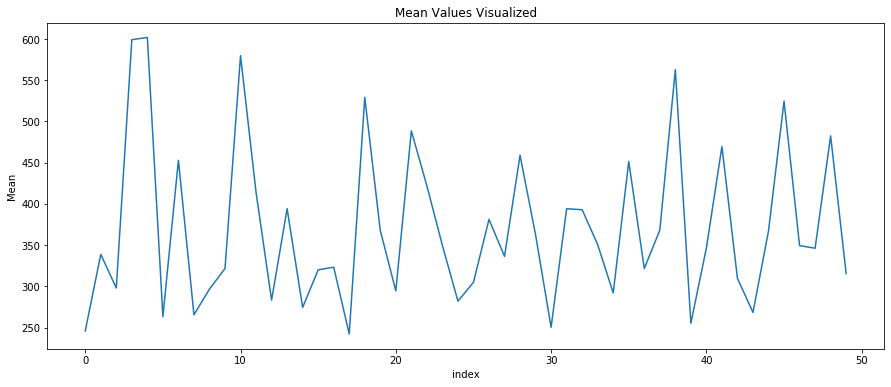

In [11]:
#For Visualizing 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(range(50), Means)
plt.title('Mean Values Visualized')
plt.ylabel('Mean')
plt.xlabel('index')
plt.show()

In [15]:
import statistics

print('Mean of MSE: ',statistics.mean(Means))
print('Std of MSE: ',statistics.stdev(Means))

Mean of MSE:  370.19255601605164
Std of MSE:  97.39882331440676


Mean of MSE increased but Std of MSE decreased